# YouTube Watch History Data Analysis

### Introduction

YouTube has become an essential part of many people's daily lives, serving as a platform for entertainment, learning, and relaxation. This project focuses on analyzing YouTube watch history data to gain insights into viewing patterns and habits.

### Project Goals
The project aims to achieve both general descriptive approaches and more personalized analyses to provide a comprehensive understanding of YouTube usage habits.

In general, I'd like to:

1. **Quantify Viewing Activity**: Determine the total number of videos watched and the total watch hours over the specified period.
2. **Explore Daily Viewing Patterns**: Calculate the average time spent watching YouTube videos each day.
3. **Identify Most Watched Videos**: Determine the most frequently watched videos based on the number of views.
4. **Analyze Video Titles**: Extract and analyze the most common keywords in video titles to identify recurring themes.
5. **Discover Peak Viewing Days**: Identify the specific days when the highest number of videos were watched and the number of likes received.
6. **Determine videos containing a specified keyword on its title, description, or tags**.
7. **Know the longest timeframe where you haven't used YouTube**.
8. **Find the most viewed, liked, or commented videos watched**.
9. **Show the longest and shortest video watched**.
10. **Get to know favorite channels**.
11. **Analyze each tag from videos**.
12. **Analyze the distribution of watch times throughout the day**.
13. **Identify the frequency of video interactions (likes, comments, shares) over time**.
14. **Determine the average session duration on YouTube**.
15. **Explore the relationship between video categories and viewing habits**.
16. **Identify trends in video consumption over different time periods (daily, weekly, monthly)**.

Additionally, I will perform more personalized analysis through my own YouTube History data along the way.

## Data Source

The history data was extracted from Google Takeout. However, it only provides the following information:

- Video Title
- Timestamp (Time it was played)
- Channel Name (Channel that posted it)
- Video link

To enrich this dataset, additional information was accumulated using the YouTube API. This allowed for the inclusion of more details for each video, such as:

- Video Tags
- Number of views
- Number of Likes
- Number of Comments
- Number of Dislikes
- Video thumbnail
- Video description
- Video duration
- Channel name and url

### Extraction Process

1. **Google Takeout**:
    - The initial dataset was downloaded from Google Takeout, which provided an HMTL file containing basic information about each video watched, including the video title, timestamp, link, and channel name.

2. **YouTube API**:
    - Using the video IDs extracted from the Google Takeout dataset, the YouTube Data API was used to retrieve additional information. 
    - A script was written in Python to interact with the YouTube Data API. This script performed the following steps:
        1. **Authenticate**: Connect to the YouTube Data API using an API key.
        2. **Request Data**: For each video ID, send a request to the YouTube API to fetch video details.
        3. **Parse Response**: Extract relevant information from the API response, such as video tags, number of likes, number of comments, and other metadata.
        4. **Merge Data**: Combine the additional information from the YouTube API with the original Google Takeout data to create a more comprehensive dataset and output it in a CSV file.

## Project Structure

- **Data Collection**: Scripts and notebooks for extracting and collecting data from Google Takeout.
- **Data Cleaning**: Steps to clean and preprocess the data to ensure it is ready for analysis.
- **Exploratory Data Analysis**: Notebooks containing analysis and visualizations to uncover insights and trends.
- **Results**: Summary of findings and key takeaways from the analysis.

## How to Use

1. **Clone the Repository**: `git clone https://github.com/your-username/your-repository.git`
2. **Install Dependencies**: `pip install -r requirements.txt`
3. **Run Notebooks**: Open and run the Jupyter Notebooks to reproduce the analysis.

## Requirements

- Python 3.x
- Jupyter Notebook
- pandas
- numpy
- matplotlib
- seaborn

## Conclusion

By analyzing the YouTube watch history data, this project aims to provide valuable insights into viewing patterns and behaviors. Whether you're interested in understanding your own YouTube usage or exploring broader trends, this analysis offers a comprehensive overview of viewing habits and preferences.

# Before we begin
I'd like to inform you that the results and insights presented here might not fully correspond to realistic viewing habits due to several factors that can affect data integrity. For example, if you use multiple YouTube accounts, the data from just one account might not provide a complete picture. Additionally, there are other scenarios that can potentially impact the results, which I will mention as we go along.

In my case, I only use one YouTube account, so all the videos I've watched are perfectly stored in the dataset. However, I still expect to encounter discrepancies due to other factors.


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### The source dataset

The dataset for this analysis was created using a two-step process that involved web scraping and API requests to gather comprehensive information about my YouTube watch history.

First, I used a Python script called youtube_scraper.py to extract data from an HTML file of my YouTube History. This HTML file was obtained through Google Takeout, which provides a detailed export of a user's YouTube activity. Using the BeautifulSoup library, the script parsed the HTML file to extract essential information for each video, including the video title, URL, the time it was played, the channel that posted it, and the channel's URL. This information was then saved into a CSV file named history.csv.

However, the HTML file from Google Takeout did not provide all the details I wanted for my analysis. To enrich the dataset with additional information, I created another Python script named youtube_api.py. This script aimed to fill in the gaps by fetching more data through the YouTube Data API. For each video entry in history.csv, the script extracted the video ID from the URL. With the video ID in hand, the script made API requests to gather further details such as the video's duration, the number of likes and dislikes it had received, and the total number of comments. This additional data provided a more comprehensive view of each video, allowing for a deeper analysis.

In [2]:
file = 'testing.csv'
df = pd.read_csv(file)

#### Let's take a peak at the dataset

In [3]:
df.head()

,title,url,video_duration,channel_name,channel_url,date_time,video_id,video_thumbnail,video_date_upload,video_views,video_likes,video_dislikes,video_comment_count,video_description,video_tags
0,"Vivaldi - Concerto No. 4 in F minor, Op. 8, RV...",https://www.youtube.com/watch?v=igYzAdRTd5c,00:09:31,Joshua Galasse,https://www.youtube.com/channel/UCB7LdHQgEM2NG...,"Jun 2, 2024, 11:40:50 PM PST",igYzAdRTd5c,https://i.ytimg.com/vi/igYzAdRTd5c/default.jpg,2018-08-25T00:57:15Z,4673273.0,133920.0,0.0,1512.0,"Joshua Galasse, Brussels Sinfonietta\nRecorded...","Joshua Galasse,vivaldi,L'inverno,4 seasons,violin"
1,F. Chopin : Nocturne in c sharp minor for viol...,https://www.youtube.com/watch?v=T7k2pmKUXxI,00:04:37,Gemma Violin,https://www.youtube.com/channel/UCMeR1_1ZOcfdG...,"Jun 2, 2024, 11:36:13 PM PST",T7k2pmKUXxI,https://i.ytimg.com/vi/T7k2pmKUXxI/default.jpg,2016-01-14T18:58:06Z,18841674.0,388495.0,0.0,7297.0,#chopin #nocturne #violinpiano #version\n\n- C...,"chopin,nocturne,violin,piano,duo,classicalmusi..."
2,Franz Liszt - Liebestraum - Love Dream,https://www.youtube.com/watch?v=KpOtuoHL45Y,00:05:51,The Wicked North,https://www.youtube.com/channel/UC5I_q7gLdDoBn...,"Jun 2, 2024, 11:30:21 PM PST",KpOtuoHL45Y,https://i.ytimg.com/vi/KpOtuoHL45Y/default.jpg,2008-10-24T06:12:47Z,38654136.0,322107.0,0.0,11423.0,Liebesträume is a set of three solo piano work...,"Franz,Liszt,Liebestraum,Love,Dream,classical,m..."
3,"Vivaldi's Winter, Movement 1 (with piano)",https://www.youtube.com/watch?v=qfvJLGiuBfo,00:03:24,Youths in Chamber Music,https://www.youtube.com/channel/UCAJm_dkVI3AsN...,"Jun 2, 2024, 11:26:56 PM PST",qfvJLGiuBfo,https://i.ytimg.com/vi/qfvJLGiuBfo/default.jpg,2016-08-18T05:08:20Z,4818636.0,107763.0,0.0,1263.0,"Danielle Liu, violin, plays ""Winter"" from The ...",NaN
4,"The 4 Seasons, Op. 8/4, RV 297, ""Winter""",https://www.youtube.com/watch?v=_FeJFs6LJjU,00:09:26,St. Mark's Philharmonic Orchestra - Topic,https://www.youtube.com/channel/UCKgZVDVyGBdCz...,"Jun 2, 2024, 11:17:28 PM PST",_FeJFs6LJjU,https://i.ytimg.com/vi/_FeJFs6LJjU/default.jpg,2015-02-21T16:40:38Z,15273326.0,217177.0,0.0,0.0,Provided to YouTube by The Orchard Enterprises...,St. Mark's Philharmonic Orchestra Antonio Viva...


In [4]:
df.tail()

,title,url,video_duration,channel_name,channel_url,date_time,video_id,video_thumbnail,video_date_upload,video_views,video_likes,video_dislikes,video_comment_count,video_description,video_tags
1843,The Best of Piano: The most beautiful classica...,https://www.youtube.com/watch?v=cGYyOY4XaFs,02:32:10,Rousseau,https://www.youtube.com/channel/UCPZUQqtVDmcjm...,"Feb 24, 2024, 5:20:53 PM PST",cGYyOY4XaFs,https://i.ytimg.com/vi/cGYyOY4XaFs/default.jpg,2020-12-17T14:01:44Z,28151163.0,395574.0,0.0,8294.0,The Best of Piano: this is a special compilati...,"piano,the best of piano,relaxing piano,study p..."
1844,Phantom Of The Opera on Electric Guitar - Lind...,https://www.youtube.com/watch?v=ZuG4Xrql7Mc,00:06:19,Lai,https://www.youtube.com/channel/UCgaq0qUbeWGU2...,"Feb 24, 2024, 5:12:45 PM PST",ZuG4Xrql7Mc,https://i.ytimg.com/vi/ZuG4Xrql7Mc/default.jpg,2013-04-08T05:20:31Z,1455825.0,15361.0,0.0,582.0,My iTunes : http://www.tunecore.com/music/laiy...,"Phantom of the opera,music of the night,angel ..."
1845,"Astor Piazzolla: Libertango, Oblivion… | Class...",https://www.youtube.com/watch?v=mOlJcWt6JbI,01:22:43,HALIDONMUSIC,https://www.youtube.com/channel/UCyOfqgtsQaM3S...,"Feb 24, 2024, 4:52:49 PM PST",mOlJcWt6JbI,https://i.ytimg.com/vi/mOlJcWt6JbI/default.jpg,2022-03-11T12:00:24Z,1683675.0,29736.0,0.0,527.0,🎵 Buy the MP3 album on the Official Halidon Mu...,"astor piazzolla,piazzolla,piazzolla libertango..."
1846,"Classical Music for Brain Power | Mozart, Beet...",https://www.youtube.com/watch?v=0UN_HbOTTcI,03:15:53,HALIDONMUSIC,https://www.youtube.com/channel/UCyOfqgtsQaM3S...,"Feb 24, 2024, 12:34:01 PM PST",0UN_HbOTTcI,https://i.ytimg.com/vi/0UN_HbOTTcI/default.jpg,2023-03-08T12:00:00Z,5719397.0,41753.0,0.0,699.0,🎵 Buy the MP3 album on the Official Halidon Mu...,"classical music brain power,brain power classi..."
1847,Computer Softwares,https://www.youtube.com/watch?v=H-fanyjyVso,02:19:01,Eddinel Valentino,https://www.youtube.com/channel/UCnbw0o0ctV1la...,"Feb 20, 2024, 6:17:15 AM PST",H-fanyjyVso,https://i.ytimg.com/vi/H-fanyjyVso/default.jpg,2024-02-13T09:25:54Z,320.0,13.0,0.0,0.0,NaN,NaN


In [5]:
df.shape

(1848, 15)

### Interpretation

There are a total of 1848 rows in the dataset.

There are 15 columns representing each video's categorical attributes. However, we do not need all of them, as some might be redundant, irrelevant, or unnecessary. For example, the video_id column contains the video ID, which is also provided at the end of the video_url link. Therefore, we can argue that it is redundant, and dropping it would save a significant amount of space.


In [6]:
df = df.drop(columns=['video_id'])
# Save the updated DataFrame to the  CSV file
df.to_csv('testing.csv', index=False)


We can also drop the channel_url as it's irrelevant in the context of our analysis. We only need to focus on the video, so the channel name would suffice. Additionally, I don't think the video_thumbnail column will provide enough detail because it's just a low-quality thumbnail. We won't need photos for now.

In [7]:
df = df.drop(columns=['channel_url', 'video_thumbnail'])
# Save the updated DataFrame to a new CSV file
df.to_csv('testing.csv', index=False)


Now, we've already gotten rid of these columns. Let's now proceed to the columns that represent count times, such as likes, dislikes, and comments. Wouldn't it be nice to represent them as integers rather than floating-point values?

In [8]:
# let's confirm its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                1848 non-null   object 
 1   url                  1848 non-null   object 
 2   video_duration       1847 non-null   object 
 3   channel_name         1848 non-null   object 
 4   date_time            1848 non-null   object 
 5   video_date_upload    1847 non-null   object 
 6   video_views          1847 non-null   float64
 7   video_likes          1847 non-null   float64
 8   video_dislikes       1847 non-null   float64
 9   video_comment_count  1847 non-null   float64
 10  video_description    1512 non-null   object 
 11  video_tags           1309 non-null   object 
dtypes: float64(4), object(8)
memory usage: 173.4+ KB


In [9]:
# proceed on converting float64 elements into an int64 type
int_columns = ['video_views', 'video_likes', 'video_dislikes', 'video_comment_count']

# Convert the specified columns to integer, keeping missing values as NaN
for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    
# check updated data
df.info()
df.to_csv('testing.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1848 non-null   object
 1   url                  1848 non-null   object
 2   video_duration       1847 non-null   object
 3   channel_name         1848 non-null   object
 4   date_time            1848 non-null   object
 5   video_date_upload    1847 non-null   object
 6   video_views          1847 non-null   Int64 
 7   video_likes          1847 non-null   Int64 
 8   video_dislikes       1847 non-null   Int64 
 9   video_comment_count  1847 non-null   Int64 
 10  video_description    1512 non-null   object
 11  video_tags           1309 non-null   object
dtypes: Int64(4), object(8)
memory usage: 180.6+ KB


### Remove empty or rows with missing values

Each row contains the video information. If a video has a non-null title, then it must also have video_duration along with other categorical values. However, upon viewing the information on the table above, it looks like there is a video that has a non-null title, url, channel_name, video_date_upload, etc. while the rest is null except for comment count and description because it might be empty for some videos. Let's inspect this specific row to decide whether we should keep it for further analysis.


Well, it is reasonable for video tags and descriptions to be empty because some YouTube videos just don't have them. However, the rest of the columns must contain accurate and complete values.

In [12]:
critical_columns = [
    'title', 'url', 'video_duration', 'channel_name', 
    'date_time', 'video_date_upload', 'video_views', 
    'video_likes', 'video_dislikes', 'video_comment_count'
]


rows_with_missing_values = df[df[critical_columns].isnull().any(axis=1)]

rows_with_missing_values


,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_dislikes,video_comment_count,video_description,video_tags
1366,Gymnastics is nothing without spotters🙏,https://www.youtube.com/watch?v=Ze9bIsedBoM,NaN,Tomas Minc,"Apr 3, 2024, 11:21:13 PM PST",NaN,<NA>,<NA>,<NA>,<NA>,NaN,NaN


We believe we have identified a data anomaly. Row 1366 has null values on columns that supposed to be fetched by YouTue API while the title, url, channel name, and date time remains. That means our API script has failed to return further information on this specific video. From my investigation, this video has been removed or deleted in YouTube that's why the YouTube API can't retrieve information such as like counts from this video.

Although this video was watched, the missing values prevent us from including it in further analysis. However, they will be included in the total count of videos watched.

Since the missing values make this row unsuitable for analysis, we will proceed by dropping them from the dataset.

The missing data is not due to an error in our data extraction process, but rather reflects changes in the YouTube platform. It is common for YouTube videos to be removed or made private by the uploader over time. Unfortunately, this means that we won't be able to include these videos in our analysis.

In [13]:
# Define the critical columns
critical_columns = [
    'title', 'url', 'video_duration', 'channel_name', 
    'date_time', 'video_date_upload', 'video_views', 
    'video_likes', 'video_dislikes', 'video_comment_count'
]

# Drop rows with missing values in critical columns
df = df.dropna(subset=critical_columns)

# Reset the DataFrame index
df = df.reset_index(drop=True)

# Save the cleaned DataFrame back to the original CSV file
df.to_csv('testing.csv', index=False)

In [14]:
critical_columns = [
    'title', 'url', 'video_duration', 'channel_name', 
    'date_time', 'video_date_upload', 'video_views', 
    'video_likes', 'video_dislikes', 'video_comment_count'
]


rows_with_missing_values = df[df[critical_columns].isnull().any(axis=1)]

# check the updated data
rows_with_missing_values

,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_dislikes,video_comment_count,video_description,video_tags


In [15]:
# Let's have a peak at the updated table

df.head()

,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_dislikes,video_comment_count,video_description,video_tags
0,"Vivaldi - Concerto No. 4 in F minor, Op. 8, RV...",https://www.youtube.com/watch?v=igYzAdRTd5c,00:09:31,Joshua Galasse,"Jun 2, 2024, 11:40:50 PM PST",2018-08-25T00:57:15Z,4673273,133920,0,1512,"Joshua Galasse, Brussels Sinfonietta\nRecorded...","Joshua Galasse,vivaldi,L'inverno,4 seasons,violin"
1,F. Chopin : Nocturne in c sharp minor for viol...,https://www.youtube.com/watch?v=T7k2pmKUXxI,00:04:37,Gemma Violin,"Jun 2, 2024, 11:36:13 PM PST",2016-01-14T18:58:06Z,18841674,388495,0,7297,#chopin #nocturne #violinpiano #version\n\n- C...,"chopin,nocturne,violin,piano,duo,classicalmusi..."
2,Franz Liszt - Liebestraum - Love Dream,https://www.youtube.com/watch?v=KpOtuoHL45Y,00:05:51,The Wicked North,"Jun 2, 2024, 11:30:21 PM PST",2008-10-24T06:12:47Z,38654136,322107,0,11423,Liebesträume is a set of three solo piano work...,"Franz,Liszt,Liebestraum,Love,Dream,classical,m..."
3,"Vivaldi's Winter, Movement 1 (with piano)",https://www.youtube.com/watch?v=qfvJLGiuBfo,00:03:24,Youths in Chamber Music,"Jun 2, 2024, 11:26:56 PM PST",2016-08-18T05:08:20Z,4818636,107763,0,1263,"Danielle Liu, violin, plays ""Winter"" from The ...",NaN
4,"The 4 Seasons, Op. 8/4, RV 297, ""Winter""",https://www.youtube.com/watch?v=_FeJFs6LJjU,00:09:26,St. Mark's Philharmonic Orchestra - Topic,"Jun 2, 2024, 11:17:28 PM PST",2015-02-21T16:40:38Z,15273326,217177,0,0,Provided to YouTube by The Orchard Enterprises...,St. Mark's Philharmonic Orchestra Antonio Viva...


Looking at the 'video_dislikes' column, I think it might not be suitable for further analysis because it is rare for the video, based on the data, to have dislikes. This means it may be set to 0 or have low values, which is not ideal for analysis. Let's try to prove this argument by showing all the unique values in the particular column.

In [16]:
unique_values = df['video_dislikes'].unique()
print(unique_values)

<IntegerArray>
[0]
Length: 1, dtype: Int64


In [17]:
# Drop the 'video_dislikes' column
df.drop(columns=['video_dislikes'], inplace=True)

# Check the updated data
# Save the cleaned DataFrame back to the original CSV file
df.to_csv('testing.csv', index=False)
df.head()


,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_comment_count,video_description,video_tags
0,"Vivaldi - Concerto No. 4 in F minor, Op. 8, RV...",https://www.youtube.com/watch?v=igYzAdRTd5c,00:09:31,Joshua Galasse,"Jun 2, 2024, 11:40:50 PM PST",2018-08-25T00:57:15Z,4673273,133920,1512,"Joshua Galasse, Brussels Sinfonietta\nRecorded...","Joshua Galasse,vivaldi,L'inverno,4 seasons,violin"
1,F. Chopin : Nocturne in c sharp minor for viol...,https://www.youtube.com/watch?v=T7k2pmKUXxI,00:04:37,Gemma Violin,"Jun 2, 2024, 11:36:13 PM PST",2016-01-14T18:58:06Z,18841674,388495,7297,#chopin #nocturne #violinpiano #version\n\n- C...,"chopin,nocturne,violin,piano,duo,classicalmusi..."
2,Franz Liszt - Liebestraum - Love Dream,https://www.youtube.com/watch?v=KpOtuoHL45Y,00:05:51,The Wicked North,"Jun 2, 2024, 11:30:21 PM PST",2008-10-24T06:12:47Z,38654136,322107,11423,Liebesträume is a set of three solo piano work...,"Franz,Liszt,Liebestraum,Love,Dream,classical,m..."
3,"Vivaldi's Winter, Movement 1 (with piano)",https://www.youtube.com/watch?v=qfvJLGiuBfo,00:03:24,Youths in Chamber Music,"Jun 2, 2024, 11:26:56 PM PST",2016-08-18T05:08:20Z,4818636,107763,1263,"Danielle Liu, violin, plays ""Winter"" from The ...",NaN
4,"The 4 Seasons, Op. 8/4, RV 297, ""Winter""",https://www.youtube.com/watch?v=_FeJFs6LJjU,00:09:26,St. Mark's Philharmonic Orchestra - Topic,"Jun 2, 2024, 11:17:28 PM PST",2015-02-21T16:40:38Z,15273326,217177,0,Provided to YouTube by The Orchard Enterprises...,St. Mark's Philharmonic Orchestra Antonio Viva...


Moving forward, we will proceed with the remaining data, ensuring that only valid and relevant entries are included in our analysis. This step is crucial to maintaining the integrity and accuracy of our results.

## Check for duplicate values

It is expected that there might be some duplicates since I have watched similar videos. However, the duplicates we are concerned with are those where every value in the row is identical that indicates a true duplicate record.

Let's check if there is.

In [18]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_comment_count,video_description,video_tags
48,Vivaldi ~ Winter - I,https://www.youtube.com/watch?v=UV5WTRLTPOU,00:03:04,Richard Brittain,"Jun 1, 2024, 11:21:37 AM PST",2010-09-11T10:50:46Z,14225,123,8,The World Rose: http://richardbrittain.wordpre...,"Winter,Part,One,Four,Seasons,Vivaldi,Christoph..."
49,Vivaldi ~ Winter - I,https://www.youtube.com/watch?v=UV5WTRLTPOU,00:03:04,Richard Brittain,"Jun 1, 2024, 11:21:37 AM PST",2010-09-11T10:50:46Z,14225,123,8,The World Rose: http://richardbrittain.wordpre...,"Winter,Part,One,Four,Seasons,Vivaldi,Christoph..."


In [20]:
# Remove duplicate rows
df = df.drop_duplicates()
# Save the cleaned DataFrame back to the original CSV file
df.to_csv('testing.csv', index=False)

# check updated data
duplicated = df[df.duplicated(keep=False)]
duplicated


,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_comment_count,video_description,video_tags


So far, we're good. Now, let's proceed with the process of string manipulation, where the cleaning of strings takes place.

In our YouTube history data table, we have identified several columns that require string manipulation to ensure consistency and cleanliness. These columns include:

**Title**: The titles of the watched videos.

**Video Description**: The descriptions of the watched videos.

**Video Tags**: The tags associated with the watched videos.

We'll apply various string manipulation techniques to these columns to standardize the data and make it more suitable for analysis.

### Title

In [21]:
df['title'] = df['title'].str.strip() ## remove trailing whitespaces
df['title'] = df['title'].str.lower()

df.to_csv('testing', index=False)

df['title']

0       vivaldi - concerto no. 4 in f minor, op. 8, rv...
1       f. chopin : nocturne in c sharp minor for viol...
2                  franz liszt - liebestraum - love dream
3               vivaldi's winter, movement 1 (with piano)
4                the 4 seasons, op. 8/4, rv 297, "winter"
                              ...                        
1842    the best of piano: the most beautiful classica...
1843    phantom of the opera on electric guitar - lind...
1844    astor piazzolla: libertango, oblivion… | class...
1845    classical music for brain power | mozart, beet...
1846                                   computer softwares
Name: title, Length: 1846, dtype: object

### Video Tags

In [22]:
df['video_tags'] = df['video_tags'].str.lower()
df.to_csv('testing.csv', index=False)
df['video_tags']

0       joshua galasse,vivaldi,l'inverno,4 seasons,violin
1       chopin,nocturne,violin,piano,duo,classicalmusi...
2       franz,liszt,liebestraum,love,dream,classical,m...
3                                                     NaN
4       st. mark's philharmonic orchestra antonio viva...
                              ...                        
1842    piano,the best of piano,relaxing piano,study p...
1843    phantom of the opera,music of the night,angel ...
1844    astor piazzolla,piazzolla,piazzolla libertango...
1845    classical music brain power,brain power classi...
1846                                                  NaN
Name: video_tags, Length: 1846, dtype: object

### Video Description

In [23]:
# Lowercase the text in the 'video_description' column
df['video_description'] = df['video_description'].str.lower()
df.to_csv('testing.csv', index=False)

df['video_description']


0       joshua galasse, brussels sinfonietta\nrecorded...
1       #chopin #nocturne #violinpiano #version\n\n- c...
2       liebesträume is a set of three solo piano work...
3       danielle liu, violin, plays "winter" from the ...
4       provided to youtube by the orchard enterprises...
                              ...                        
1842    the best of piano: this is a special compilati...
1843    my itunes : http://www.tunecore.com/music/laiy...
1844    🎵 buy the mp3 album on the official halidon mu...
1845    🎵 buy the mp3 album on the official halidon mu...
1846                                                  NaN
Name: video_description, Length: 1846, dtype: object

Looking at the `video_date_upload`, we can see that the format is quite hard to interpret at first glance. Let's standardize the format in a more visually friendly way.

In [24]:
# Replace 'T' and 'Z' with a space and an empty string, respectively
df['video_date_upload'] = df['video_date_upload'].str.replace('T', ' ').str.replace('Z', '')

df.to_csv('testing.csv', index=False)

df['video_date_upload']


0       2018-08-25 00:57:15
1       2016-01-14 18:58:06
2       2008-10-24 06:12:47
3       2016-08-18 05:08:20
4       2015-02-21 16:40:38
               ...         
1842    2020-12-17 14:01:44
1843    2013-04-08 05:20:31
1844    2022-03-11 12:00:24
1845    2023-03-08 12:00:00
1846    2024-02-13 09:25:54
Name: video_date_upload, Length: 1846, dtype: object

In [25]:
df

,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_comment_count,video_description,video_tags
0,"vivaldi - concerto no. 4 in f minor, op. 8, rv...",https://www.youtube.com/watch?v=igYzAdRTd5c,00:09:31,Joshua Galasse,"Jun 2, 2024, 11:40:50 PM PST",2018-08-25 00:57:15,4673273,133920,1512,"joshua galasse, brussels sinfonietta\nrecorded...","joshua galasse,vivaldi,l'inverno,4 seasons,violin"
1,f. chopin : nocturne in c sharp minor for viol...,https://www.youtube.com/watch?v=T7k2pmKUXxI,00:04:37,Gemma Violin,"Jun 2, 2024, 11:36:13 PM PST",2016-01-14 18:58:06,18841674,388495,7297,#chopin #nocturne #violinpiano #version\n\n- c...,"chopin,nocturne,violin,piano,duo,classicalmusi..."
2,franz liszt - liebestraum - love dream,https://www.youtube.com/watch?v=KpOtuoHL45Y,00:05:51,The Wicked North,"Jun 2, 2024, 11:30:21 PM PST",2008-10-24 06:12:47,38654136,322107,11423,liebesträume is a set of three solo piano work...,"franz,liszt,liebestraum,love,dream,classical,m..."
3,"vivaldi's winter, movement 1 (with piano)",https://www.youtube.com/watch?v=qfvJLGiuBfo,00:03:24,Youths in Chamber Music,"Jun 2, 2024, 11:26:56 PM PST",2016-08-18 05:08:20,4818636,107763,1263,"danielle liu, violin, plays ""winter"" from the ...",NaN
4,"the 4 seasons, op. 8/4, rv 297, ""winter""",https://www.youtube.com/watch?v=_FeJFs6LJjU,00:09:26,St. Mark's Philharmonic Orchestra - Topic,"Jun 2, 2024, 11:17:28 PM PST",2015-02-21 16:40:38,15273326,217177,0,provided to youtube by the orchard enterprises...,st. mark's philharmonic orchestra antonio viva...
...,...,...,...,...,...,...,...,...,...,...,...
1842,the best of piano: the most beautiful classica...,https://www.youtube.com/watch?v=cGYyOY4XaFs,02:32:10,Rousseau,"Feb 24, 2024, 5:20:53 PM PST",2020-12-17 14:01:44,28151163,395574,8294,the best of piano: this is a special compilati...,"piano,the best of piano,relaxing piano,study p..."
1843,phantom of the opera on electric guitar - lind...,https://www.youtube.com/watch?v=ZuG4Xrql7Mc,00:06:19,Lai,"Feb 24, 2024, 5:12:45 PM PST",2013-04-08 05:20:31,1455825,15361,582,my itunes : http://www.tunecore.com/music/laiy...,"phantom of the opera,music of the night,angel ..."
1844,"astor piazzolla: libertango, oblivion… | class...",https://www.youtube.com/watch?v=mOlJcWt6JbI,01:22:43,HALIDONMUSIC,"Feb 24, 2024, 4:52:49 PM PST",2022-03-11 12:00:24,1683675,29736,527,🎵 buy the mp3 album on the official halidon mu...,"astor piazzolla,piazzolla,piazzolla libertango..."
1845,"classical music for brain power | mozart, beet...",https://www.youtube.com/watch?v=0UN_HbOTTcI,03:15:53,HALIDONMUSIC,"Feb 24, 2024, 12:34:01 PM PST",2023-03-08 12:00:00,5719397,41753,699,🎵 buy the mp3 album on the official halidon mu...,"classical music brain power,brain power classi..."


In [26]:
# Let's try to get more insights to spot discrepancies in the data
# Set the display option to show the full numerical values
pd.set_option('display.float_format', '{:.2f}'.format)

# Now, when you call describe, it will display full numerical values
df.describe()

,video_views,video_likes,video_comment_count
count,1846.00,1846.00,1846.00
mean,22740452.81,480965.63,7979.62
std,91687448.75,1493619.36,57178.84
min,9.00,0.00,0.00
25%,431460.00,9707.25,282.00
50%,3925802.00,77323.50,1721.00
75%,18274827.00,316392.00,7105.00
max,1790713372.00,18352229.00,2337668.00



## Exploratory Data Analysis

Now that we've standardized and cleaned the data to ensure its accuracy and consistency, it's time to begin into an exploratory data analysis (EDA) to extract meaningful insights from our YouTube history.

In this section, we will explore various aspects of the data to gain a better understanding. Specifically, we will:



### Determine the start-date and end-date

In [27]:
end_date = df.iloc[0]['date_time']
start_date = df.iloc[-1]['date_time']

print("Start date: ", start_date)
print("End date: ", end_date)

Start date:  Feb 20, 2024, 6:17:15 AM PST
End date:  Jun 2, 2024, 11:40:50 PM PST


In [77]:
# Replace 'T' and 'Z' with a space and an empty string, respectively
df['video_date_upload'] = df['video_date_upload'].str.replace('T', ' ').str.replace('Z', '')

df.to_csv('testing.csv', index=False)

df['video_date_upload']

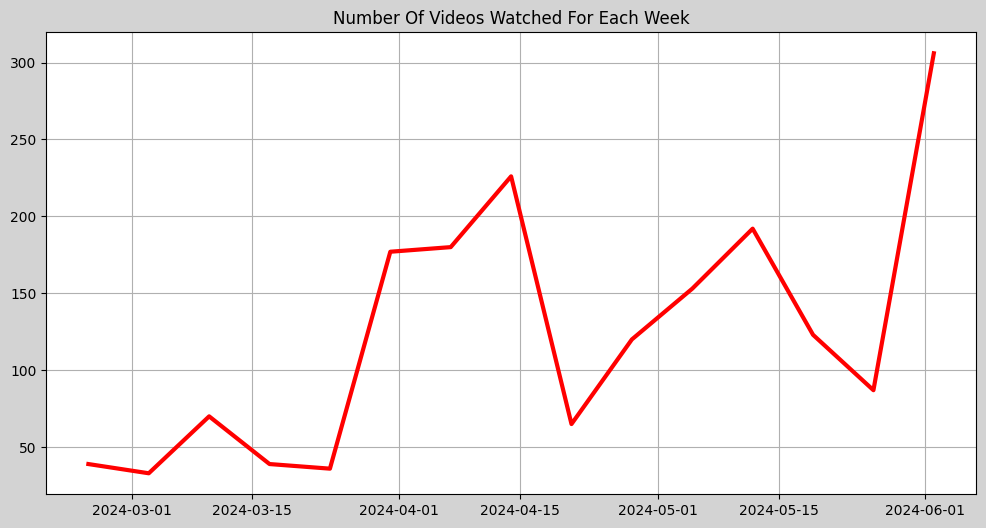

In [68]:
df['date_time'] = pd.to_datetime(df['date_time'])

df_sorted = df.sort_values(by='date_time')

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Resample the data by week and count the occurrences
weekly_counts = df.resample('W').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
weekly_counts = weekly_counts[start_date:end_date]

# Reset the index to get the week starting date as a column
weekly_counts = weekly_counts.reset_index(name='frequency')

df.reset_index(inplace=True)

# Display the result
dates = weekly_counts['date_time']
videos = weekly_counts['frequency']

# Set the figure size
plt.figure(figsize=(12, 6), facecolor='lightgrey')  # Adjust the width and height as needed
plt.title('Number Of Videos Watched For Each Week')
# Add the grid
plt.grid(True)

# Create a line plot
plt.plot(dates, videos, color='red', linewidth=3)

# Show the plot
plt.show()


## Interpretation

In the first and second weeks, there were fewer than 50 videos watched. After the fifth week, there is a consistent growth in the number of videos watched, but it significantly dropped in week 9. As for the remaining weeks, weeks 13 and 14 had lower counts. The week that has the fewest video counts is the 2nd week, while the last week has the highest.

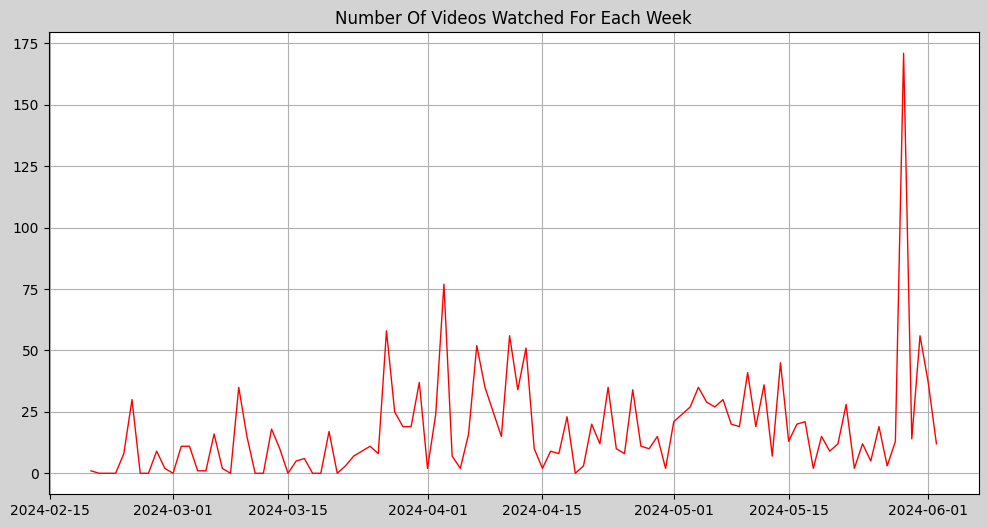

In [74]:
df['date_time'] = pd.to_datetime(df['date_time'])

df_sorted = df.sort_values(by='date_time')

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Resample the data by week and count the occurrences
weekly_counts = df.resample('D').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
weekly_counts = weekly_counts[start_date:end_date]

# Reset the index to get the week starting date as a column
weekly_counts = weekly_counts.reset_index(name='frequency')

df.reset_index(inplace=True)

# Display the result
dates = weekly_counts['date_time']
videos = weekly_counts['frequency']

# Set the figure size
plt.figure(figsize=(12, 6), facecolor='lightgrey')  # Adjust the width and height as needed
plt.title('Number Of Videos Watched For Each Week')
# Add the grid
plt.grid(True)

# Create a line plot
plt.plot(dates, videos, color='red', linewidth=1)

# Show the plot
plt.show()


In [44]:

# Convert the 'date_time' column to a datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the DataFrame based on the 'date_time' column
df_sorted = df.sort_values(by='date_time')

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Resample the data by day and count the occurrences
daily_counts = df.resample('D').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
daily_counts = daily_counts[start_date:end_date]

# Reset the index to get the date as a column
daily_counts = daily_counts.reset_index(name='frequency')

# Display the result as a table
daily_counts


,date_time,frequency
0,2024-02-20,1
1,2024-02-21,0
2,2024-02-22,0
3,2024-02-23,0
4,2024-02-24,8
...,...,...
99,2024-05-29,171
100,2024-05-30,14
101,2024-05-31,56
102,2024-06-01,37


### Calculate the average watch per day

In [47]:
import pandas as pd

# Convert the 'date_time' column to a datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Sort the DataFrame based on the 'date_time' column
df_sorted = df.sort_values(by='date_time')

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Resample the data by day and count the occurrences
daily_counts = df.resample('D').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
daily_counts = daily_counts[start_date:end_date]

# Reset the index to get the date as a column
daily_counts = daily_counts.reset_index(name='frequency')

# Calculate mean, median, and mode
mean_frequency = daily_counts['frequency'].mean()
median_frequency = daily_counts['frequency'].median()
mode_frequency = daily_counts['frequency'].value_counts().idxmax()


# Reset the index to make 'date_time' a regular column again
df.reset_index(inplace=True)

# Create a DataFrame to display the results as a table
summary_table = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Frequency': [mean_frequency, median_frequency, mode_frequency]
})

# Display the summary table
print(summary_table)


  Statistic  Frequency
0      Mean      17.75
1    Median      12.00
2      Mode       0.00


### Interpretation

The average number of videos watched per day from February 20 to June 02, 2024, is 18 videos.

## Top 10 Most viewed video watched on YouTube from the past three months

Let's determine the top 10 most viewed video watched.

In [4]:
most_watched = df.sort_values(by='video_views', ascending=False).head(10)

# Reset the index to make 'date_time' a regular column again
most_watched.reset_index(inplace=True)
# Display the table in Jupyter notebook
from IPython.display import display

# Format 'video_views' column to include commas
most_watched['video_views'] = most_watched['video_views'].map('{:,}'.format)

print("Top 10 videos with the highest views:")
display(most_watched[['title', 'video_views']])



Top 10 videos with the highest views:


,title,video_views
0,4 non blondes - what's up (official music video),"1,790,713,372"
1,in the end [official hd music video] - linkin ...,"1,780,553,521"
2,rick astley - never gonna give you up (officia...,"1,543,818,357"
3,evanescence - bring me to life (official hd mu...,"1,376,677,674"
4,bottle trick,"988,253,205"
5,three years later and we leased our first stud...,"650,721,166"
6,he broke the #1 rule of zen gardens,"584,538,749"
7,blackpink - '뚜두뚜두 (ddu-du ddu-du)' dance pract...,"501,459,399"
8,the cranberries - linger (official music video),"466,597,055"
9,chocolate covered strawberry! 🍓🍫 the perfect v...,"454,387,405"


In [5]:
most_watched

,index,title,url,video_duration,channel_name,date_time,video_date_upload,video_views,video_likes,video_comment_count,video_description,video_tags
0,1175,4 non blondes - what's up (official music video),https://www.youtube.com/watch?v=6NXnxTNIWkc,00:04:53,4NonBlondesVEVO,"Apr 11, 2024, 1:12:30 AM PST",2011-02-23 21:30:01,"1,790,713,372",7586982,205825,celebrating one billion views!! remastered in ...,"non blondes what's up cover,non blondes what's..."
1,1171,in the end [official hd music video] - linkin ...,https://www.youtube.com/watch?v=eVTXPUF4Oz4,00:03:39,Linkin Park,"Apr 11, 2024, 1:26:33 AM PST",2009-10-26 18:31:10,"1,780,553,521",11694394,441163,in the end [official hd music video] - linkin ...,"linkin park,hybrid theory,in the end,chester b..."
2,11,rick astley - never gonna give you up (officia...,https://www.youtube.com/watch?v=dQw4w9WgXcQ,00:03:33,Rick Astley,"Jun 2, 2024, 5:17:02 PM PST",2009-10-25 06:57:33,"1,543,818,357",17635769,2337668,the official video for “never gonna give you u...,"rick astley,never gonna give you up,nggyu,neve..."
3,1172,evanescence - bring me to life (official hd mu...,https://www.youtube.com/watch?v=3YxaaGgTQYM,00:04:14,EvanescenceVEVO,"Apr 11, 2024, 1:15:19 AM PST",2009-12-02 09:44:34,"1,376,677,674",9812069,296238,"official hd music video for “bring me to life,...","evanescence,wind-up,pop"
4,135,bottle trick,https://www.youtube.com/watch?v=7Peb3EcBUSI,00:00:10,Ricky Berwick,"May 29, 2024, 8:07:04 PM PST",2022-12-05 17:00:04,"988,253,205",18300005,46847,thanks to these amazing guys for sponsoring th...,"ricky berwick,funny videos,memes,comedy,happy,..."
5,200,three years later and we leased our first stud...,https://www.youtube.com/watch?v=LLo9u8GYUU0,00:01:00,Hulett Brothers,"May 29, 2024, 7:37:55 PM PST",2023-05-24 20:13:12,"650,721,166",18352229,52198,NaN,NaN
6,162,he broke the #1 rule of zen gardens,https://www.youtube.com/watch?v=xegBdXXTCo0,00:00:17,Zach King,"May 29, 2024, 7:51:48 PM PST",2023-11-12 14:02:00,"584,538,749",12602640,29702,NaN,"zen garden,zen,zach king,shorts,tiktok,tiktokl..."
7,1600,blackpink - '뚜두뚜두 (ddu-du ddu-du)' dance pract...,https://www.youtube.com/watch?v=jOJbXvjZ-cQ,00:03:34,BLACKPINK,"Mar 27, 2024, 8:41:47 AM PST",2018-06-18 03:00:02,"501,459,399",5686643,184829,download on itunes @ http://smarturl.it/bp_squ...,"블랙핑크,blackpink,yg,squareup,square,up,스퀘어업,뚜두뚜두..."
8,1174,the cranberries - linger (official music video),https://www.youtube.com/watch?v=G6Kspj3OO0s,00:04:38,TheCranberriesVEVO,"Apr 11, 2024, 1:13:40 AM PST",2009-06-16 22:14:01,"466,597,055",1939459,74048,official music video for linger by the cranber...,"the cranberries,cranberries,the cranberries li..."
9,175,chocolate covered strawberry! 🍓🍫 the perfect v...,https://www.youtube.com/watch?v=iyAvtb_zpYQ,00:01:01,Amaury Guichon,"May 29, 2024, 7:47:57 PM PST",2024-01-30 18:05:50,"454,387,405",13874164,68571,NaN,NaN


Let's visualize the trend of likes, comments, and video duration for the top 10 most-viewed videos from the past 3 months.

C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46748 (\N{HANGUL SYLLABLE DDU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127851 (\N{CHOCOLATE BAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


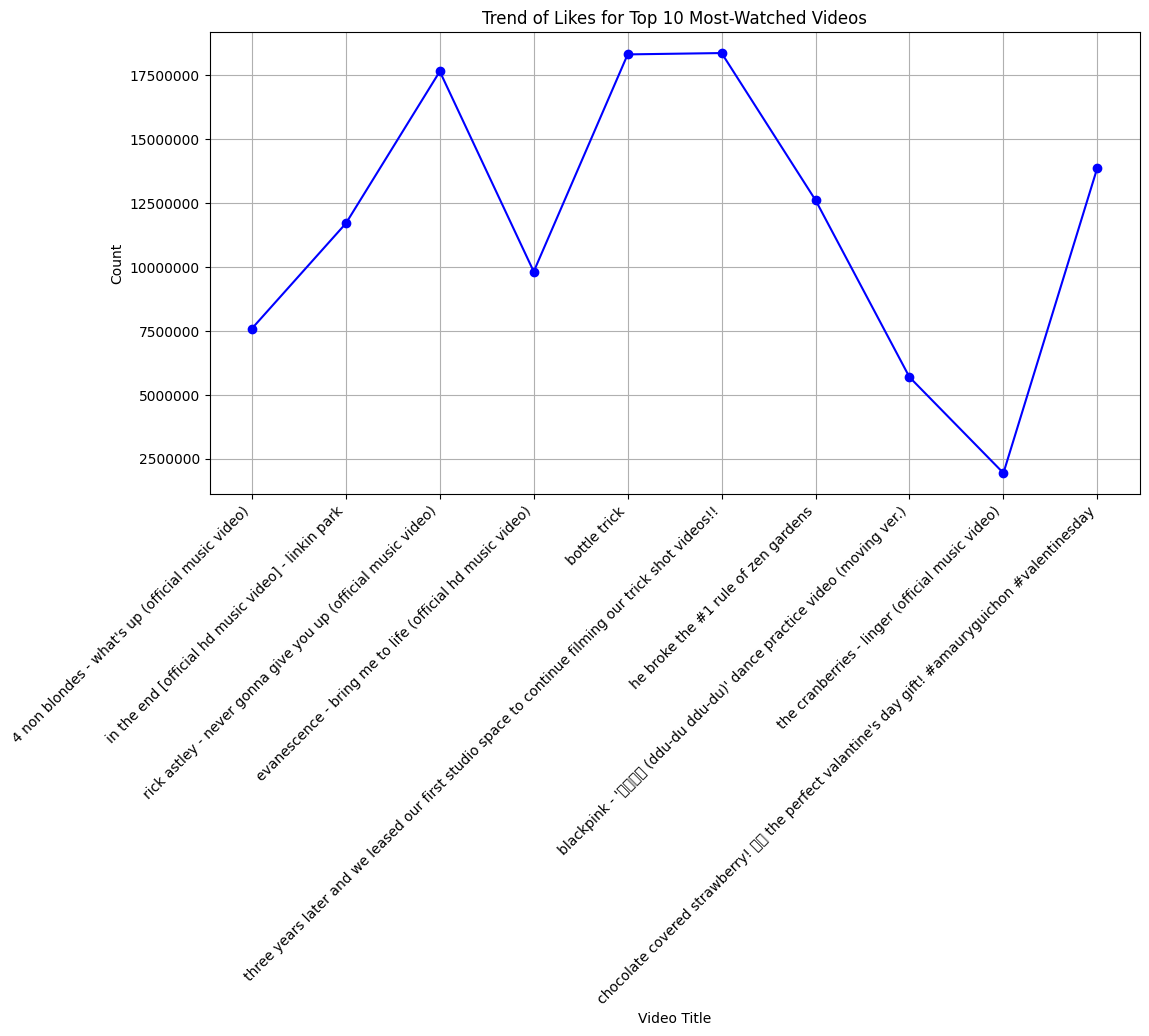

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Plotting code
# Your plotting code here


title = most_watched['title']
likes = most_watched['video_likes']
comments = most_watched['video_comment_count']

# Set the figure size
plt.figure(figsize=(12, 6), facecolor='white')  # Adjust the width and height as needed
plt.title('Trend of Likes for Top 10 Most-Watched Videos')
plt.xlabel('Video Title')
plt.ylabel('Count')

# Plotting the trend of likes
plt.plot(title, likes, label='Likes', color='blue', marker='o')


# Specify y-axis ticks in actual format
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation for y-axis

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.show()

C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46748 (\N{HANGUL SYLLABLE DDU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127827 (\N{STRAWBERRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus Admin\PycharmProjects\youtube_watch_analysis\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127851 (\N{CHOCOLATE BAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


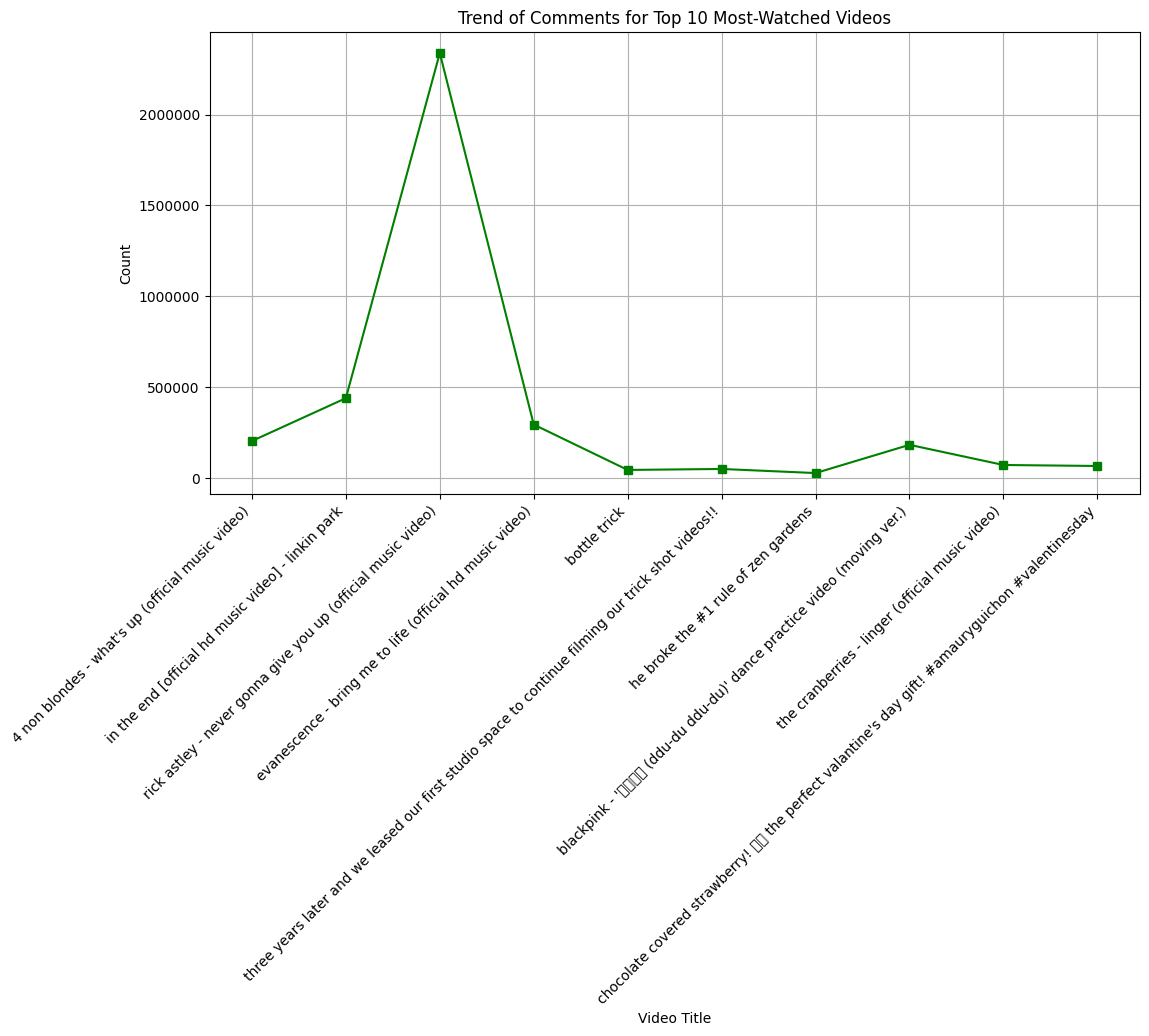

In [48]:
title = most_watched['title']
likes = most_watched['video_likes']
comments = most_watched['video_comment_count']

# Set the figure size
plt.figure(figsize=(12, 6), facecolor='white')  # Adjust the width and height as needed
plt.title('Trend of Comments for Top 10 Most-Watched Videos')
plt.xlabel('Video Title')
plt.ylabel('Count')

# Plotting the trend of comments
plt.plot(title, comments, label='Comments', color='green', marker='s')

# Specify y-axis ticks in actual format
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation for y-axis

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.show()

In [31]:
most_watched = df.sort_values(by='video_views', ascending=False).head(10)

duration = most_watched
duration = duration.sort_values(by='video_duration', ascending=False)

# Reset the index to make 'date_time' a regular column again
duration.reset_index(inplace=True)

duration[['title', 'video_duration']]


,title,video_duration
0,4 non blondes - what's up (official music video),00:04:53
1,the cranberries - linger (official music video),00:04:38
2,evanescence - bring me to life (official hd mu...,00:04:14
3,in the end [official hd music video] - linkin ...,00:03:39
4,blackpink - '뚜두뚜두 (ddu-du ddu-du)' dance pract...,00:03:34
5,rick astley - never gonna give you up (officia...,00:03:33
6,chocolate covered strawberry! 🍓🍫 the perfect v...,00:01:01
7,three years later and we leased our first stud...,00:01:00
8,he broke the #1 rule of zen gardens,00:00:17
9,bottle trick,00:00:10


In [46]:
# Reset the index to make 'date_time' a regular column again
df.reset_index(inplace=True)

## Interpretation

The most viewed video in my YouTube History Data is the official music video of "What's Up" by 4 Non Blondes.

The most liked video in the top 10 is a YouTube Shorts titled "Three Years Later and We Leased Our First Studio Space to Continue Filming Our Trick Shot Videos!!".

The most commented video in the top 10 is the official music video of a song by Rick Astley, "Never Gonna Give You Up" – the legendary prank link bait.

The video with the longest duration in the top 10 is also the most viewed one, while the shortest duration goes to the video titled "Bottle Trick".

Looking at the Top 10 most viewed videos in my history data, it contains two types of videos: regular YouTube videos and YouTube Shorts. Let's try to identify the ratio between these two types of videos based on our dataset.

In this analysis, we will categorize YouTube Shorts as having a duration of less than or equal to 61 seconds or having the "#Shorts" substring in its title, case insensitively.

*Even though YouTube standardized shorts to be a maximum of 60 seconds, some shorts may have a duration of 61 seconds because when they were uploaded, they were exactly 60 seconds, and YouTube adds an additional second to videos uploaded*.

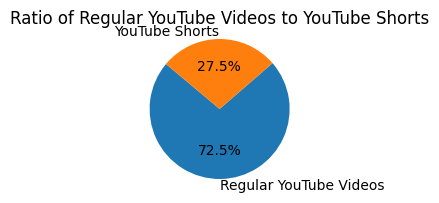

In [71]:
normal_or_shorts = df[['title', 'video_duration']]

video_shorts_count = ((df['title'].str.contains('#shorts', case=False)) |
         (pd.to_timedelta(df['video_duration']).dt.total_seconds() <= 61)).sum()

video_normal_count = normal_or_shorts.shape[0] - video_shorts_count

counts = [video_normal_count, video_shorts_count]
# Create a pie chart
plt.figure(figsize=(5, 2))
plt.pie(counts, labels=['Regular YouTube Videos', 'YouTube Shorts'], autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Regular YouTube Videos to YouTube Shorts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Determine the day when most videos were watched

In [6]:

# Convert the 'date_time' column to a datetime object
df['date_time'] = pd.to_datetime(df['date_time'])

# Set the 'date_time' column as the index
df.set_index('date_time', inplace=True)

# Resample the data by day and count the occurrences
daily_counts = df.resample('D').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
daily_counts = daily_counts[start_date:end_date]

# Reset the index to get the date as a column
daily_counts = daily_counts.reset_index(name='frequency')

# Find the date with the highest frequency
max_row = daily_counts.loc[daily_counts['frequency'].idxmax()]

df.reset_index(inplace=True)

# Display the date with the most videos watched and the frequency
max_date = max_row['date_time']
max_frequency = max_row['frequency']

max_date, max_frequency

(Timestamp('2024-05-29 00:00:00'), 171)

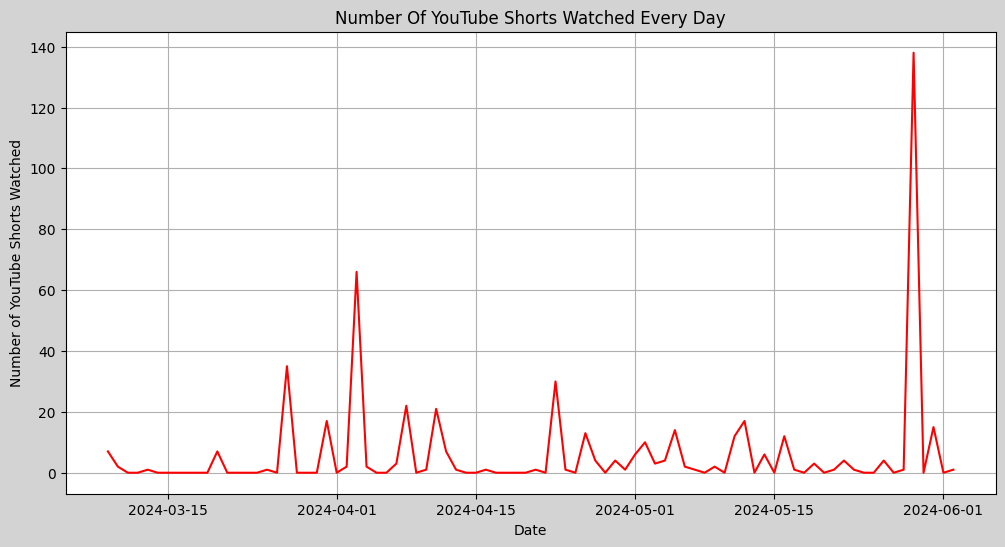

In [17]:
# Convert the 'date_time' column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Apply your condition to filter the rows
condition = ((df['title'].str.contains('#shorts', case=False)) |
             (pd.to_timedelta(df['video_duration']).dt.total_seconds() <= 61))

# Only include the YouTube Shorts
filtered_df = df[condition]

# Set the 'date_time' column as the index
filtered_df.set_index('date_time', inplace=True)

# Resample the data by week and count the occurrences
weekly_counts = filtered_df.resample('D').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
weekly_counts = weekly_counts[start_date:end_date]

# Reset the index to get the week starting date as a column
weekly_counts = weekly_counts.reset_index(name='frequency')

# Display the result
dates = weekly_counts['date_time']
videos = weekly_counts['frequency']

# Set the figure size
plt.figure(figsize=(12, 6), facecolor='lightgrey')
plt.title('Number Of YouTube Shorts Watched Every Day')
plt.xlabel('Date')
plt.ylabel('Number of YouTube Shorts Watched')
plt.grid(True)  # Add the grid

# Create a line plot
plt.plot(dates, videos, color='red', linewidth=1.5)

# Show the plot
plt.show()

## Interpretation



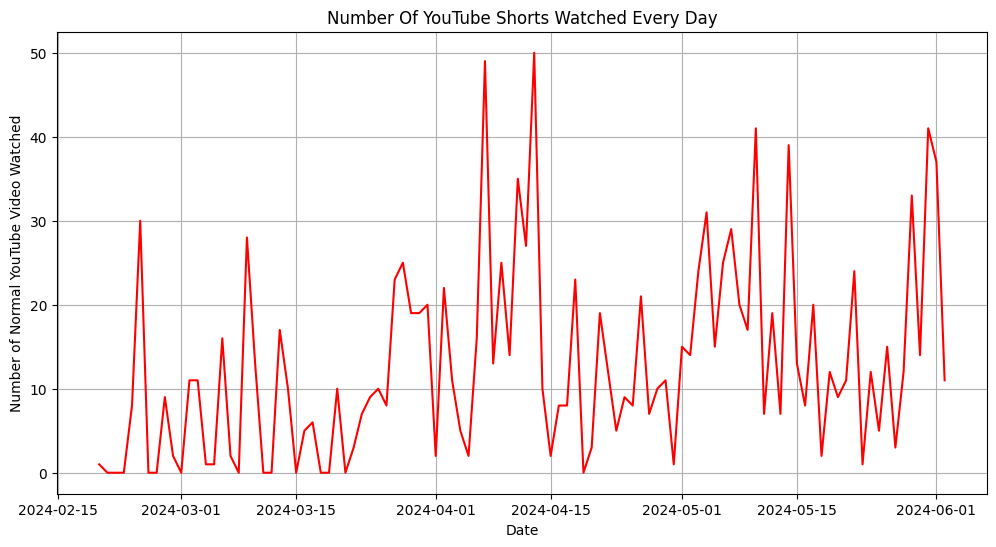

In [39]:
# Convert the 'date_time' column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Apply your condition to filter the rows
condition = ((df['title'].str.contains('#shorts', case=False)) |
             (pd.to_timedelta(df['video_duration']).dt.total_seconds() <= 61))

# Only include the YouTube Shorts
filtered_df = df[~condition]

# Set the 'date_time' column as the index
filtered_df.set_index('date_time', inplace=True)

# Resample the data by week and count the occurrences
weekly_counts = filtered_df.resample('D').size()

# Filter the data to include only February to June
start_date = '2024-02-20'
end_date = '2024-06-02'
weekly_counts = weekly_counts[start_date:end_date]

# Reset the index to get the week starting date as a column
weekly_counts = weekly_counts.reset_index(name='frequency')

# Display the result
dates = weekly_counts['date_time']
videos = weekly_counts['frequency']

# Set the figure size
plt.figure(figsize=(12, 6), facecolor='white')
plt.title('Number Of YouTube Shorts Watched Every Day')
plt.xlabel('Date')
plt.ylabel('Number of Normal YouTube Video Watched')
plt.grid(True)  # Add the grid

# Create a line plot
plt.plot(dates, videos, color='red', linewidth=1.5)

# Show the plot
plt.show()